# Wave Equation

The wave equation is described by the following partial differential equation:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

where \( u \) represents the wave function, \( t \) is time, \( x \) is the spatial coordinate, and \( c \) is the constant wave speed.

To solve this equation numerically, we need to define boundary and initial conditions. The boundary conditions are given by \( u(0,t) = u(1,t) = 0 \), indicating that the wave is zero at both ends of the spatial domain [0, 1]. The initial conditions are \( u(x,0) = \sin(\pi x) \) and \( \frac{\partial u}{\partial t}(x,0) = 0 \), specifying the initial shape and velocity of the wave.

We discretize the wave equation using finite difference methods. The second spatial derivative \( \frac{\partial^2 u}{\partial x^2} \) is approximated using a centered difference scheme, and the second time derivative \( \frac{\partial^2 u}{\partial t^2} \) is also approximated using a centered difference. This approach leads to the following discretized form:

$$
\frac{u^{n+1}_i - 2u^n_i + u^{n-1}_i}{\Delta t^2} = c^2 \frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2}
$$

Here, \( u^n_i \) represents the wave function at spatial point \( i \) and time step \( n \). \( \Delta t \) and \( \Delta x \) are the time and space step sizes, respectively.

Rearranging the equation, we obtain an explicit formula for the wave function at the next time step:

$$
u^{n+1}_i = 2u^n_i - u^{n-1}_i + \frac{c^2 \Delta t^2}{\Delta x^2} (u^n_{i+1} - 2u^n_i + u^n_{i-1})
$$

This equation allows us to compute the wave function at any point in time and space, given the previous values, adhering to the stability conditions dictated by the Courant-Friedrichs-Lewy (CFL) criterion.

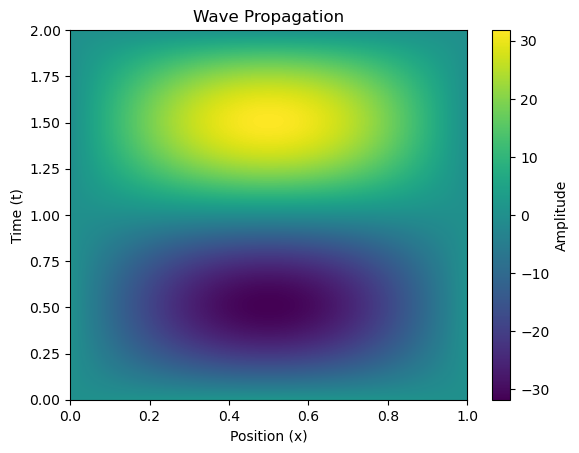

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 1.0  # wave speed
L = 1.0  # length of the domain
T = 2.0  # total time
dx = 0.01  # spatial step size
dt = 0.01  # time step size

# Grid setup
x = np.arange(0, L + dx, dx)  # spatial grid
t = np.arange(0, T + dt, dt)  # time grid
nx = len(x)
nt = len(t)

# Initialize u
u = np.zeros((nt, nx))  # u at time step n
u[0, :] = np.sin(np.pi * x)  # initial condition

# Stability condition
assert c**2 * dt**2 / dx**2 <= 1, "Stability condition violated"

# Time-stepping loop
for n in range(1, nt - 1):
    # Apply boundary conditions
    u[n, 0] = u[n, -1] = 0

    # Update interior points
    for i in range(1, nx - 1):
        u[n+1, i] = (2*u[n, i] - u[n-1, i] + 
                     (c**2 * dt**2 / dx**2) * 
                     (u[n, i+1] - 2*u[n, i] + u[n, i-1]))

# Optional: Plotting
plt.imshow(u, extent=[0, L, 0, T], origin='lower', aspect='auto')
plt.colorbar(label='Amplitude')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Wave Propagation')
plt.show()